<a href="https://colab.research.google.com/github/ArturBensch/Projeto-ShipPerformance/blob/main/Projeto_Ship_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Ship Performance**


# Contexto
The Ship Performance Dataset is a synthetic yet realistic collection of data designed to represent key operational metrics and attributes of various ship types in the Gulf of Guinea.

# Motivation
The maritime sector is one of the most critical components of global trade, contributing significantly to economic growth and sustainability. Understanding ship performance, fuel efficiency, and operational cost factors are essential for improving decision-making and minimizing environmental impact.

# Fonte
https://www.kaggle.com/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset/data

# Importaçoes e leitura de DataSet

In [2]:
## Importações
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

dataset = os.listdir("/content/drive/MyDrive/DataSets/Ship Performance/")


In [3]:
## Leitura do arquivo
tb_ship_performance=pd.read_csv("/content/drive/MyDrive/DataSets/Ship Performance/Ship_Performance_Dataset.csv")
display(tb_ship_performance.head())

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


# Análise da Base

In [4]:
# Volume de dados do DataFrame
print(f'Entradas no DataFrame: {tb_ship_performance.shape[0]} linhas no total')
print(f'Variáveis no DataFrame: {tb_ship_performance.shape[1]} colunas no total')

Entradas no DataFrame: 2736 linhas no total
Variáveis no DataFrame: 18 colunas no total


In [5]:
# Verificar os tipos das variáveis
display(tb_ship_performance.dtypes)

,0
Date,object
Ship_Type,object
Route_Type,object
Engine_Type,object
Maintenance_Status,object
Speed_Over_Ground_knots,float64
Engine_Power_kW,float64
Distance_Traveled_nm,float64
Draft_meters,float64
Weather_Condition,object


In [6]:
# Ordem decrescente das variáveis em relação aos seus valores ausentes
(tb_ship_performance.isnull().sum() / tb_ship_performance.shape[0]).sort_values(ascending=False)

,0
Weather_Condition,0.049708
Route_Type,0.049708
Engine_Type,0.049708
Maintenance_Status,0.049708
Ship_Type,0.049708
Operational_Cost_USD,0.000000
Weekly_Voyage_Count,0.000000
Seasonal_Impact_Score,0.000000
Efficiency_nm_per_kWh,0.000000
Turnaround_Time_hours,0.000000


Por meio de Histogramas buscamos encontrar Outliers

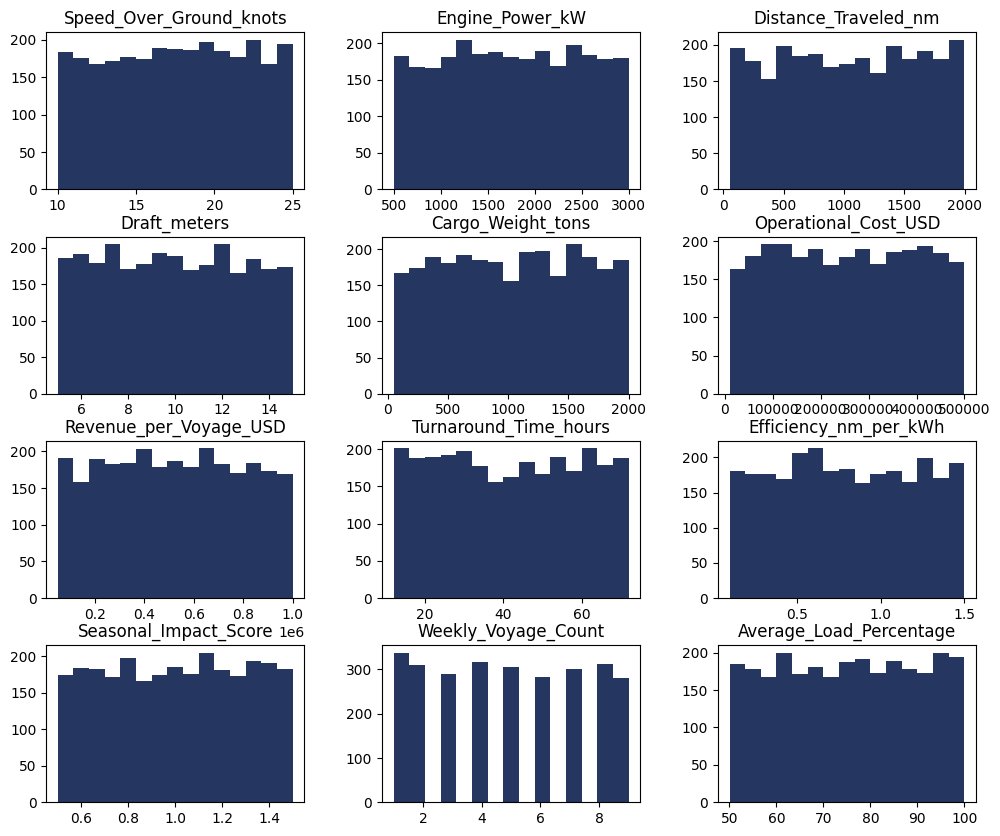

In [7]:
# Histograma das variáveis numéricas
tb_ship_performance.hist(bins=15, figsize=(12, 10), grid=False, color="#253760");

In [8]:
tb_ship_performance[['Weekly_Voyage_Count']].describe().T

## Sem Outliers que possam impactar a análise visto que as variáveis estão condizentes.

,count,mean,std,min,25%,50%,75%,max
Weekly_Voyage_Count,2736.0,4.914839,2.597647,1.0,3.0,5.0,7.0,9.0


# **Análise Exploratória Inicial**

Nessa primeira etapa, vamos entender como as variáveis se comportam entre si, além das estatísticas iniciais como a media,mediana  dispersão

### Buscando uma correlação entre as variáveis

In [9]:
## Buscando uma correlação entre as variáveis
corr = tb_ship_performance[[
'Speed_Over_Ground_knots',
'Engine_Power_kW',
'Distance_Traveled_nm',
'Draft_meters',
'Cargo_Weight_tons',
'Operational_Cost_USD',
'Revenue_per_Voyage_USD',
'Turnaround_Time_hours',
'Efficiency_nm_per_kWh',
'Seasonal_Impact_Score',]].corr()
# Print da matriz de correlação
display(corr)

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score
Speed_Over_Ground_knots,1.000000,-0.003299,-0.010198,-0.015117,-0.005009,-0.035825,0.002370,-0.005812,0.019273,0.028357
Engine_Power_kW,-0.003299,1.000000,-0.009120,0.008133,-0.012654,-0.012260,-0.010947,-0.032442,-0.017918,-0.011767
Distance_Traveled_nm,-0.010198,-0.009120,1.000000,-0.010686,0.013680,0.002468,0.040388,-0.026672,0.003229,0.016989
Draft_meters,-0.015117,0.008133,-0.010686,1.000000,0.006463,0.004111,0.000634,-0.029324,-0.017294,-0.001700
Cargo_Weight_tons,-0.005009,-0.012654,0.013680,0.006463,1.000000,-0.036499,0.016556,-0.031743,0.006178,-0.026754
Operational_Cost_USD,-0.035825,-0.012260,0.002468,0.004111,-0.036499,1.000000,0.023865,-0.003679,0.003258,0.021142
Revenue_per_Voyage_USD,0.002370,-0.010947,0.040388,0.000634,0.016556,0.023865,1.000000,-0.026839,0.016669,0.019510
Turnaround_Time_hours,-0.005812,-0.032442,-0.026672,-0.029324,-0.031743,-0.003679,-0.026839,1.000000,0.009138,0.009526
Efficiency_nm_per_kWh,0.019273,-0.017918,0.003229,-0.017294,0.006178,0.003258,0.016669,0.009138,1.000000,-0.005023
Seasonal_Impact_Score,0.028357,-0.011767,0.016989,-0.001700,-0.026754,0.021142,0.019510,0.009526,-0.005023,1.000000


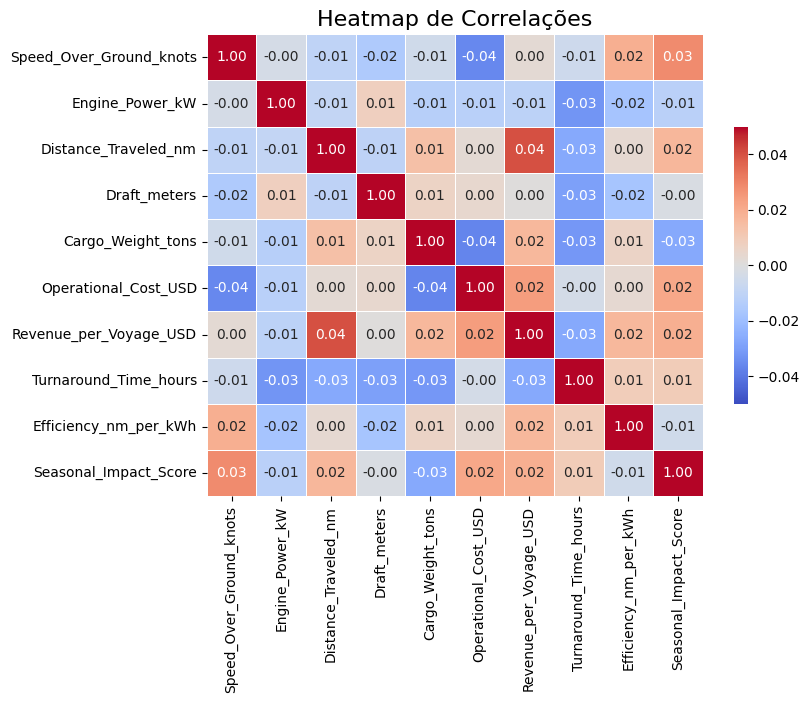

In [31]:
plt.figure(figsize=(8, 6))  # Tamanho do gráfico
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-0.05, vmax=0.05,
            linewidths=0.5, linecolor="white", cbar_kws={"shrink": 0.6})
plt.title("Heatmap de Correlações", fontsize=16)
plt.show()

As variáveis nao possuem correlação forte, ou seja, proximo de -1 ou 1. Sendo assim:

 **As variáveis não estão diretamente relacionadas de forma previsível**:

1.Quando o valor de uma variável aumenta ou diminui, isso não causa um padrão consistente no comportamento da outra variável.
Pode haver outros tipos de relação (***não-linear***):

2.Uma correlação fraca não descarta a possibilidade de existir alguma relação entre as variáveis, mas essa relação pode ser ***não-linear*** (ex.: curva, exponencial, etc.), o que a correlação linear não detecta.

3.As variáveis podem ser independentes:
Também é possível que não exista qualquer relação entre elas; ou seja, mudanças em uma variável não influenciam a outra.

## Análise estatística das variáveis

In [11]:

tb_ship_performance[['Speed_Over_Ground_knots',
'Engine_Power_kW',
'Distance_Traveled_nm',
'Draft_meters',
'Cargo_Weight_tons',
'Operational_Cost_USD',
'Revenue_per_Voyage_USD',
'Turnaround_Time_hours',
'Efficiency_nm_per_kWh',
'Seasonal_Impact_Score',
'Average_Load_Percentage']].describe().round(2)

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Average_Load_Percentage
count,2736.00,2736.00,2736.00,2736.00,2736.00,2736.00,2736.00,2736.00,2736.00,2736.00,2736.00
mean,17.60,1757.61,1036.41,9.93,1032.57,255143.34,521362.06,41.75,0.80,1.00,75.22
std,4.31,717.00,568.63,2.88,558.70,140890.48,271211.63,17.63,0.40,0.29,14.51
min,10.01,501.03,50.43,5.00,50.23,10092.31,50351.81,12.02,0.10,0.50,50.01
25%,13.93,1148.10,548.51,7.44,553.98,131293.38,290346.39,26.17,0.46,0.76,62.70
50%,17.71,1757.49,1037.82,9.92,1043.21,257157.65,520176.93,41.59,0.79,1.01,75.50
75%,21.28,2382.59,1540.93,12.41,1527.72,381796.93,750072.79,57.36,1.15,1.25,87.72
max,25.00,2998.73,1998.34,14.99,1999.13,499734.87,999916.70,71.97,1.50,1.50,100.00


Nesse quadro é possivel ter maior compreensão dos campos numéricos

# Comparação de eficiencia energética entre diferentes tipos de categoria
( Route_Type, Engine_Type, Ship_Type, Weather_Condition)

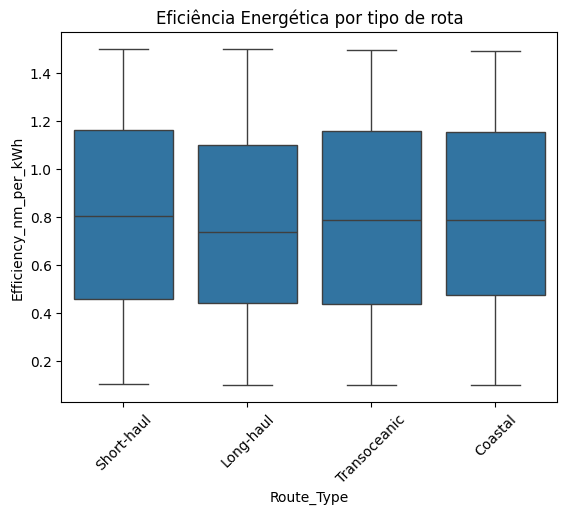

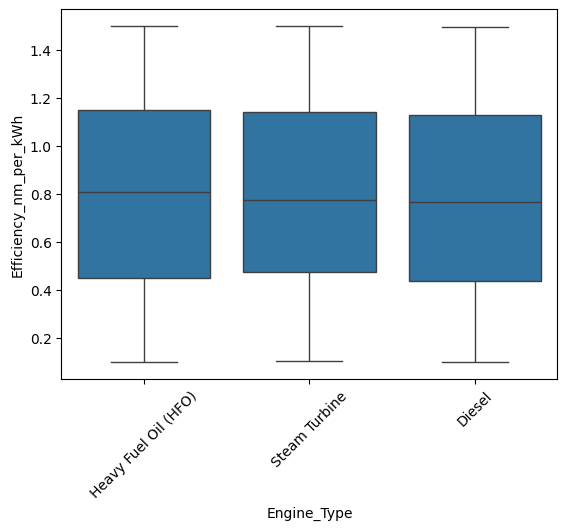

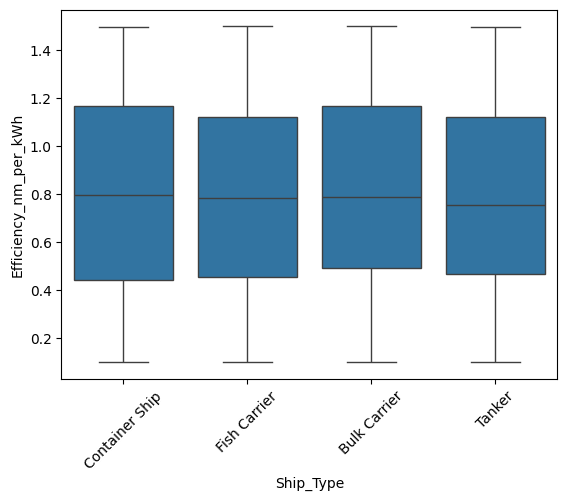

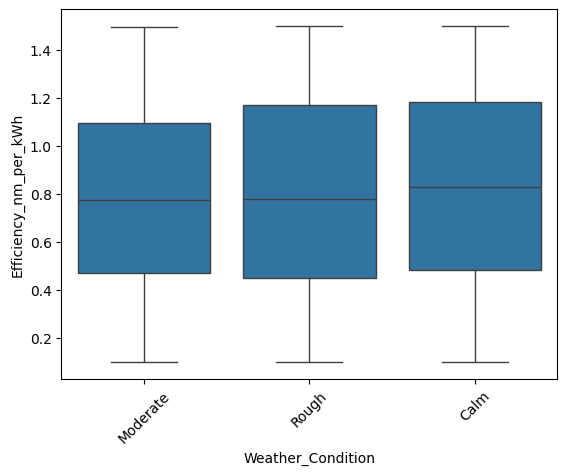

In [12]:
# Barplot de eficiência energética  por tipo de rota
sns.boxplot(data=tb_ship_performance, x='Route_Type', y='Efficiency_nm_per_kWh')
plt.title("Eficiência Energética por tipo de rota")
plt.xticks(rotation=45)
plt.show()

# Barplot de eficiência energética por tipo de engine
sns.boxplot(data=tb_ship_performance, x='Engine_Type', y='Efficiency_nm_per_kWh')
plt.xticks(rotation=45)
plt.show()

# Boxplot de eficiência energética por tipo de navio
sns.boxplot(data=tb_ship_performance, x='Ship_Type', y='Efficiency_nm_per_kWh')
plt.xticks(rotation=45)
plt.show()

# Boxplot de eficiência energética por tipo de clima
sns.boxplot(data=tb_ship_performance, x='Weather_Condition', y='Efficiency_nm_per_kWh')
plt.xticks(rotation=45)
plt.show()

As principais análises para Eficiênia é que existe um equilíbrio em todas as categorais estudadas, tendo os principais pontos que impactam na eficiência energética a condição climática e o tipo de rota. Contudo não é um ponto que possa interferir na performace

Todas as rotas possuem valores de custo operacional semelhantes, porém um destaque para o Coastal tendo um custo menor

# Performace por Custo e Receita

In [13]:
## Criando o campo Lucro com o objetivo de analisar a performasse dos navios de acordo com a sua margem financeira
tb_ship_performance['Lucro_Operacional'] = tb_ship_performance['Revenue_per_Voyage_USD'] - tb_ship_performance['Operational_Cost_USD']

display(tb_ship_performance[['Revenue_per_Voyage_USD', 'Operational_Cost_USD', 'Lucro_Operacional']].describe().round(2))

,Revenue_per_Voyage_USD,Operational_Cost_USD,Lucro_Operacional
count,2736.00,2736.00,2736.00
mean,521362.06,255143.34,266218.72
std,271211.63,140890.48,302625.26
min,50351.81,10092.31,-444584.05
25%,290346.39,131293.38,40885.28
50%,520176.93,257157.65,262716.14
75%,750072.79,381796.93,492215.84
max,999916.70,499734.87,977168.39


Por meio desse quadro, nota-se que exite uma grande variaçao de lucro_operacional. Isso fica visível na diferença entre a media e o desvio padrão(std)

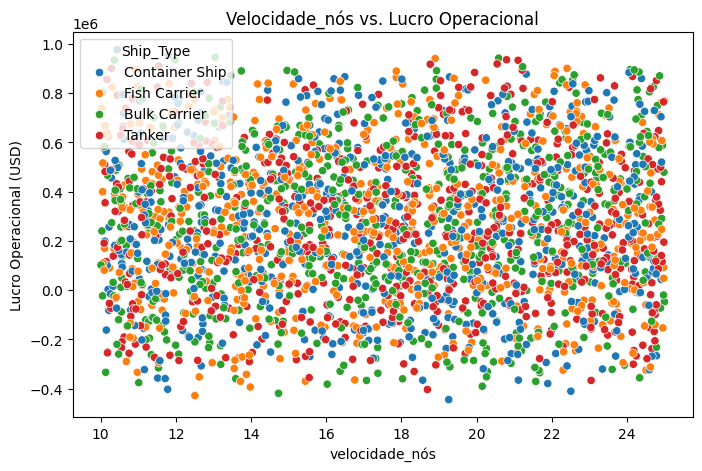

In [23]:
# Scatterplot: Custo Operacional x Lucro Operacional
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tb_ship_performance, x='Speed_Over_Ground_knots', y='Lucro_Operacional', hue='Ship_Type')
plt.title('Velocidade_nós vs. Lucro Operacional')
plt.xlabel('velocidade_nós')
plt.ylabel('Lucro Operacional (USD)')
plt.show()

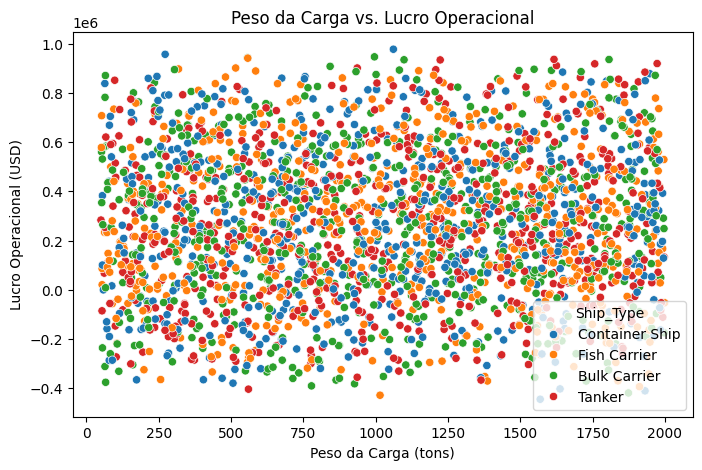

In [15]:
# Scatterplot: Peso da Carga x Lucro Operacional
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tb_ship_performance, x='Cargo_Weight_tons', y='Lucro_Operacional', hue='Ship_Type')
plt.title('Peso da Carga vs. Lucro Operacional')
plt.xlabel('Peso da Carga (tons)')
plt.ylabel('Lucro Operacional (USD)')
plt.show()

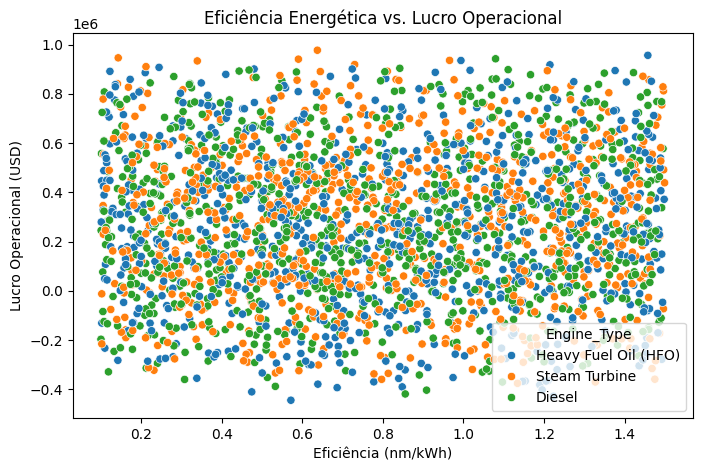

In [16]:
# Scatterplot: Eficiência x Lucro Operacional
plt.figure(figsize=(8, 5))
sns.scatterplot(data=tb_ship_performance, x='Efficiency_nm_per_kWh', y='Lucro_Operacional', hue='Engine_Type')
plt.title('Eficiência Energética vs. Lucro Operacional')
plt.xlabel('Eficiência (nm/kWh)')
plt.ylabel('Lucro Operacional (USD)')
plt.show()

Nesse quadros vimos que no conjunto total das embarcações  nao há uma relaçao direta entre o lucro e a eficiência energética do motor, a velocidade percorrida e do peso carregado

# **Alta Performance** x **Baixa Performance**

In [17]:
##Obtendo o lucro médio e criando as categorias alta e baixa de acordo com o lucro médio
lucro_medio = tb_ship_performance['Lucro_Operacional'].mean()
tb_ship_performance['Performance'] = np.where(tb_ship_performance['Lucro_Operacional'] > lucro_medio, 'Alta', 'Baixa')

performance_comparison = tb_ship_performance.groupby('Performance')[['Distance_Traveled_nm', 'Cargo_Weight_tons', 'Efficiency_nm_per_kWh', 'Turnaround_Time_hours','Engine_Power_kW']].mean()
display("Comparação entre Navios de Alta e Baixa Performance:")
display(performance_comparison)

'Comparação entre Navios de Alta e Baixa Performance:'

,Distance_Traveled_nm,Cargo_Weight_tons,Efficiency_nm_per_kWh,Turnaround_Time_hours,Engine_Power_kW
Performance,,,,,
Alta,1062.770798,1044.702314,0.804791,41.350778,1762.261506
Baixa,1010.500122,1020.655154,0.792627,42.137393,1753.041252


Se o lucro operacional de um navio estiver acima desse valor médio, ele será classificado como **"Alta Performance"**. Caso contrário, será classificado como **"Baixa Performance"**.
Com isso, conseguimos separar os navios em dois grupos e analisar eles separadamente.

In [25]:
## separando os navios nas diferentes categorias
navios_alta_performance = tb_ship_performance[tb_ship_performance['Performance'] == 'Alta']
navios_baixa_performance = tb_ship_performance[tb_ship_performance['Performance'] == 'Baixa']

##Obtendo os tipos de embarcações para cada categoria
tipos_navio_alta = navios_alta_performance['Ship_Type'].value_counts()
tipos_navio_baixa = navios_baixa_performance['Ship_Type'].value_counts()

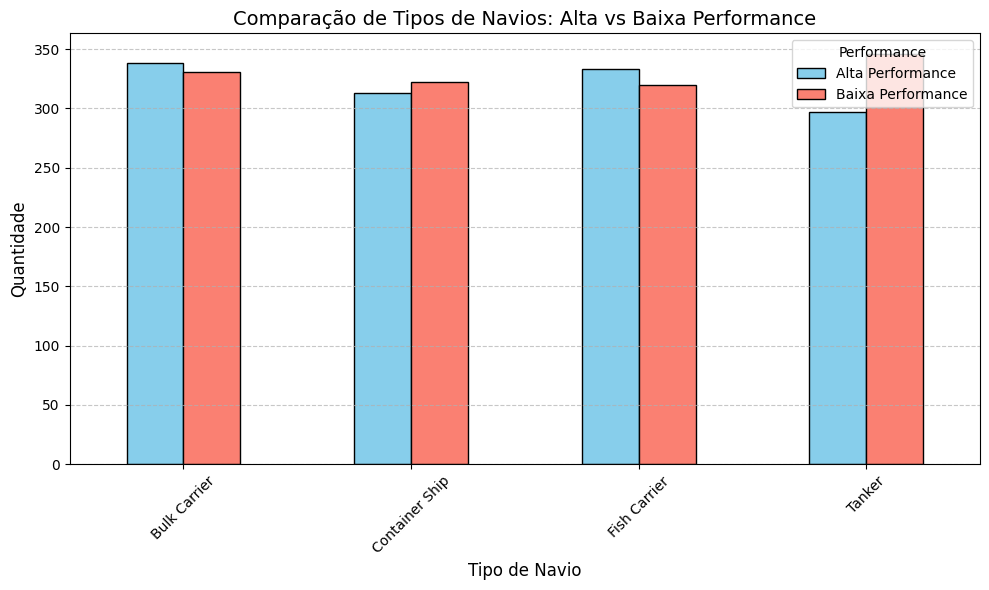

In [19]:
comparacao_tipos_navio = pd.DataFrame({
    'Alta Performance': tipos_navio_alta,
    'Baixa Performance': tipos_navio_baixa
}).fillna(0)  # Substituir NaN por 0, caso algum tipo esteja ausente em uma categoria

# Criar o gráfico de barras lado a lado
comparacao_tipos_navio.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')

# Adicionar título e rótulos
plt.title('Comparação de Tipos de Navios: Alta vs Baixa Performance', fontsize=14)
plt.xlabel('Tipo de Navio', fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Performance', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.tight_layout()
plt.show()

- O navio tipo *Tanker* possui maior número entre os de baixa performance
- Já o navio de container esta entre o que tem maiores números de alta performance

# **Análise sobre as embarcações Tanker**

In [20]:
# Filtrar navios Tanker em alta performance
tanker_alta_performance = navios_alta_performance[navios_alta_performance['Ship_Type'] == 'Tanker']

# Filtrar navios Tanker em baixa performance
tanker_baixa_performance = navios_baixa_performance[navios_baixa_performance['Ship_Type'] == 'Tanker']

Distribuição para Maintenance_Status:


,Alta Performance (%),Baixa Performance (%)
Maintenance_Status,,
Critical,32.404181,32.727273
Fair,33.449477,35.151515
Good,34.146341,32.121212


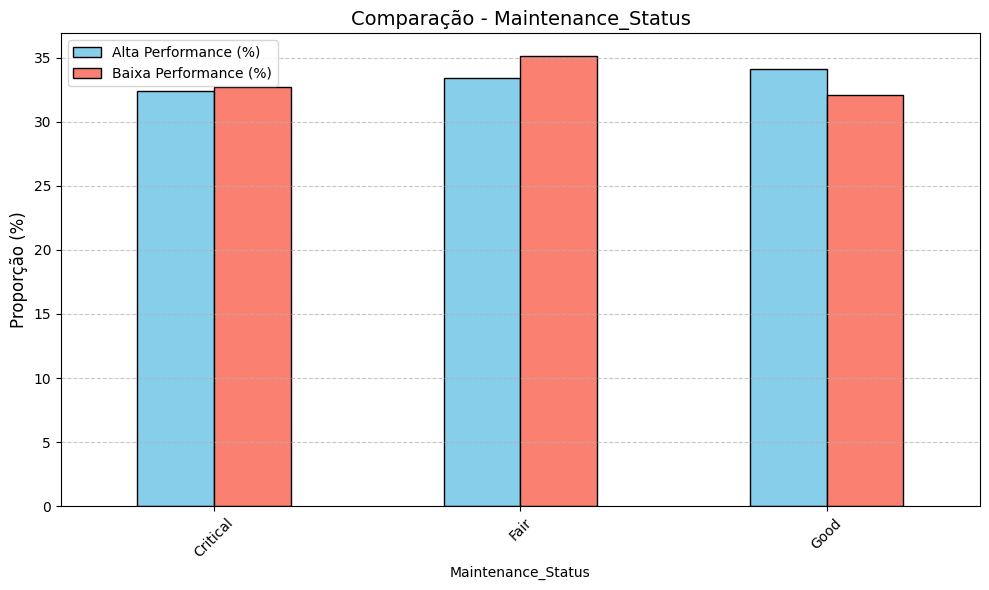

Distribuição para Engine_Type:


,Alta Performance (%),Baixa Performance (%)
Engine_Type,,
Diesel,34.035088,35.093168
Heavy Fuel Oil (HFO),33.333333,32.919255
Steam Turbine,32.631579,31.987578


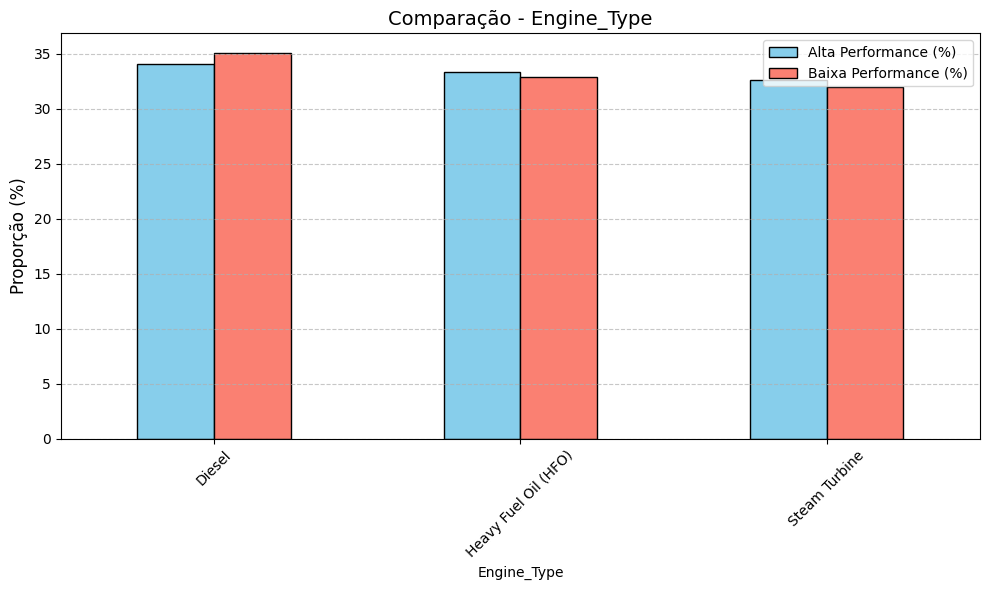

Distribuição para Route_Type:


,Alta Performance (%),Baixa Performance (%)
Route_Type,,
Coastal,25.622776,26.139818
Long-haul,27.758007,26.443769
Short-haul,22.775801,25.835866
Transoceanic,23.843416,21.580547


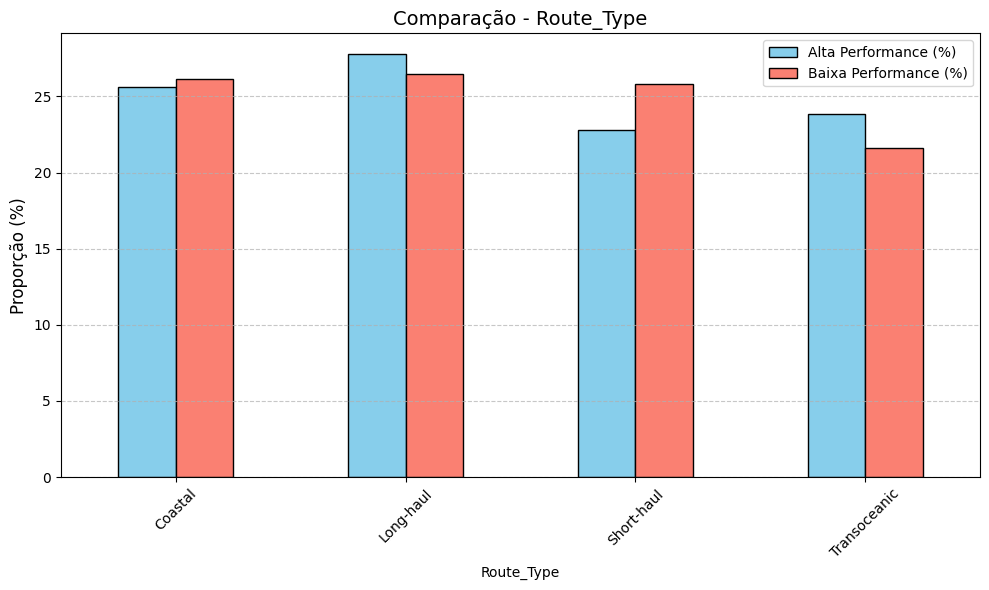

Distribuição para Weekly_Voyage_Count:


,Alta Performance (%),Baixa Performance (%)
Weekly_Voyage_Count,,
1,12.121212,10.693642
2,12.457912,12.138728
3,13.468013,11.271676
4,9.764310,15.028902
5,11.447811,7.803468
6,10.101010,10.693642
7,10.101010,10.982659
8,12.457912,13.294798
9,8.080808,8.092486


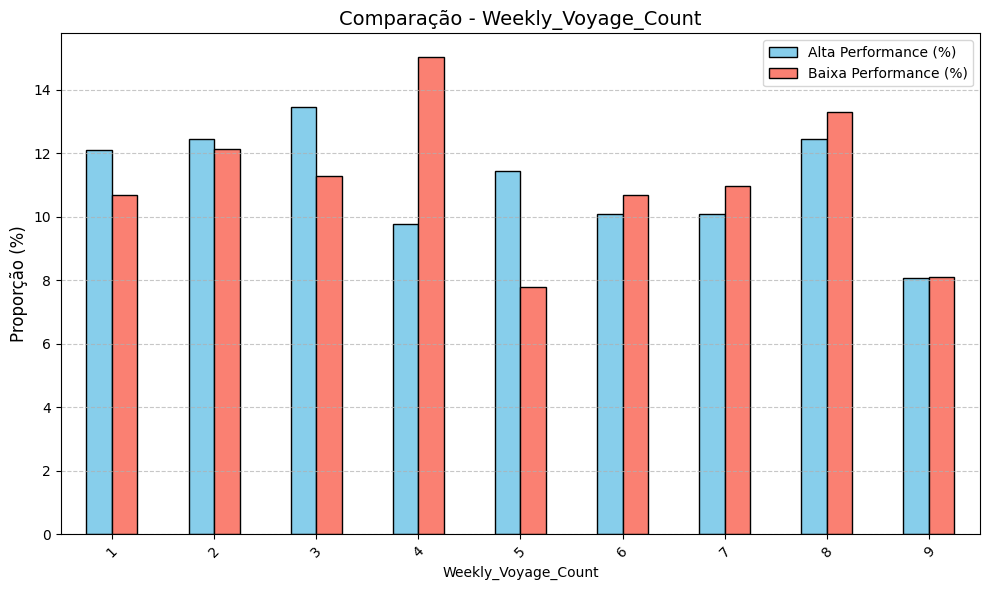

Distribuição para Weather_Condition:


,Alta Performance (%),Baixa Performance (%)
Weather_Condition,,
Calm,31.690141,31.831832
Moderate,28.169014,37.837838
Rough,40.140845,30.330330


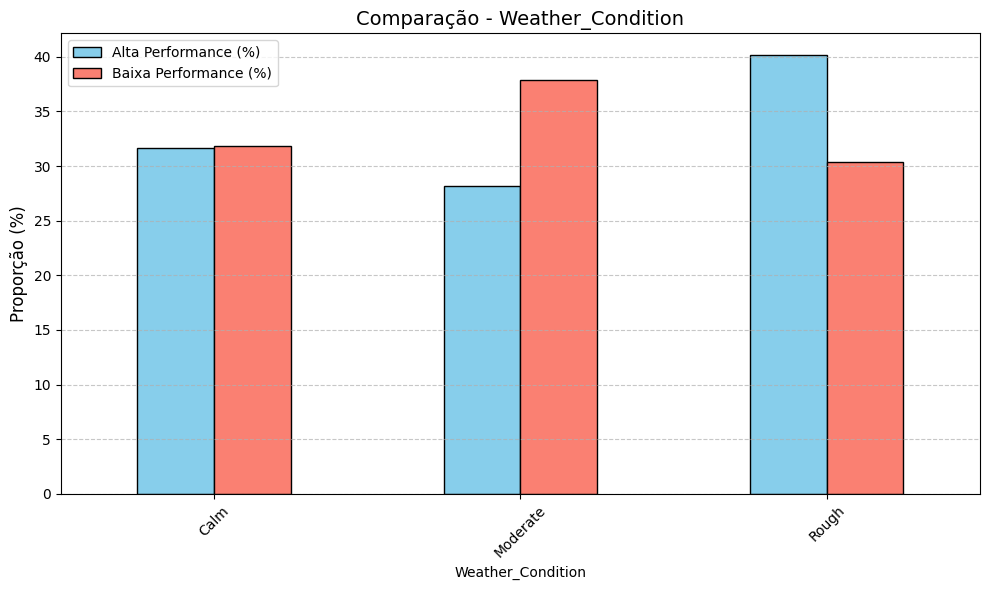

In [21]:
# Comparação de variáveis categóricas
categoricas = ['Maintenance_Status', 'Engine_Type', 'Route_Type','Weekly_Voyage_Count','Weather_Condition']

for col in categoricas:
    print(f"Distribuição para {col}:")
    alta = tanker_alta_performance[col].value_counts(normalize=True) * 100
    baixa = tanker_baixa_performance[col].value_counts(normalize=True) * 100

    comparacao = pd.DataFrame({'Alta Performance (%)': alta, 'Baixa Performance (%)': baixa}).fillna(0)
    display(comparacao)

    # Criar gráfico de barras
    comparacao.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')
    plt.title(f'Comparação - {col}', fontsize=14)
    plt.ylabel('Proporção (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Com isso, conseguimos criar os primerios pontos de insights para análisar e focar dentro das embarcações *Tanker*:
- A rota do tipo short-raul apresenta,proporcionalmente, o maior número de navios de baixa performance.
- O clima Moderado tem uma quantidade superior de baixa performance lucrativa comparada com as demais.
- Os navios tanker que possuem viagens inferior a 4 semanas apresentam queda na lucratividade, um destaque para aqueles que estao exatamente 4 semanas.


# Variáveis Contínuas

Nota-se que não existe uma correlação entre velocidade e peso entre as categorias geral de Alta e Baixa Performance

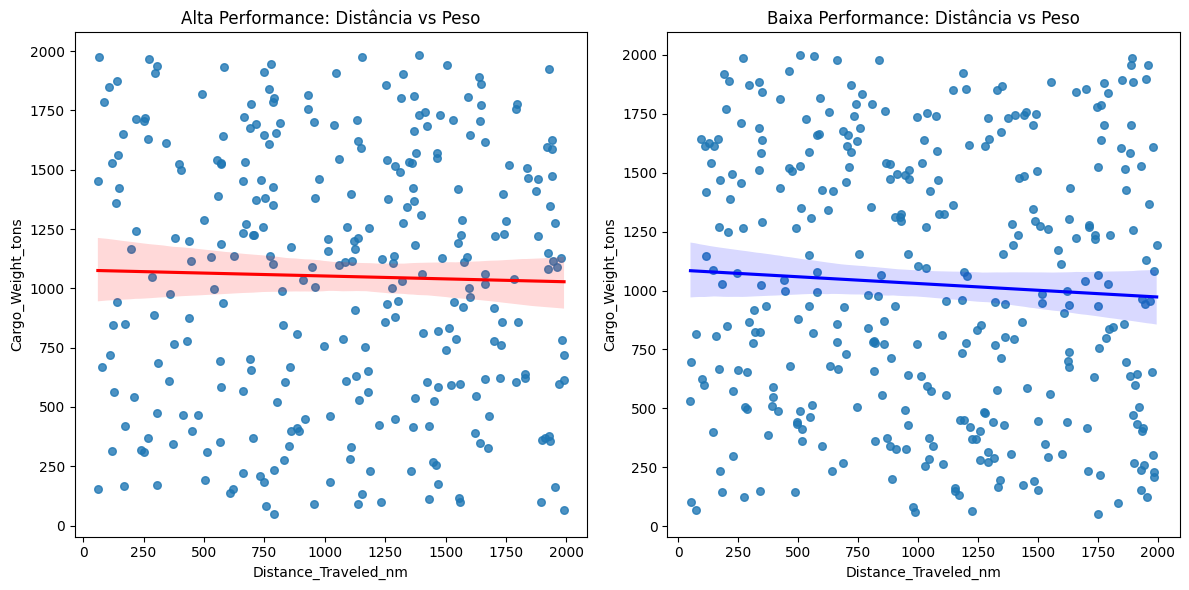

'Correlação Alta Performance:\n'

,Distance_Traveled_nm,Cargo_Weight_tons
Distance_Traveled_nm,1.000000,-0.024705
Cargo_Weight_tons,-0.024705,1.000000


'Correlação Baixa Performance:\n'

,Distance_Traveled_nm,Cargo_Weight_tons
Distance_Traveled_nm,1.000000,-0.058951
Cargo_Weight_tons,-0.058951,1.000000


In [32]:
plt.figure(figsize=(12, 6))

# Alta performance
plt.subplot(1, 2, 1)
sns.regplot(x='Distance_Traveled_nm', y='Cargo_Weight_tons', data=tanker_alta_performance, scatter_kws={'s': 30}, line_kws={"color": "red"})
plt.title('Alta Performance: Distância vs Peso')

# Baixa performance
plt.subplot(1, 2, 2)
sns.regplot(x='Distance_Traveled_nm', y='Cargo_Weight_tons', data=tanker_baixa_performance, scatter_kws={'s': 30}, line_kws={"color": "blue"})
plt.title('Baixa Performance: Distância vs Peso')

plt.tight_layout()
plt.show()

# Calcular a correlação para cada grupo
correlacao_alta = tanker_alta_performance[['Distance_Traveled_nm', 'Cargo_Weight_tons']].corr()
correlacao_baixa = tanker_baixa_performance[['Distance_Traveled_nm', 'Cargo_Weight_tons']].corr()

display("Correlação Alta Performance:\n", correlacao_alta)
display("Correlação Baixa Performance:\n", correlacao_baixa)